In [1]:
#take Wine Quality data sets
#1. Install the ucimlrepo package (Commented to avoid making mess) 
# Do "!pip install ucimlrepo"
#2 Import data sets to code
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

In [2]:
#(TO VIEW ALL DATA PURELY)
# metadata 
#print(wine_quality.metadata) 
# variable information 
#print(wine_quality.variables) 


#cleaned abit
import pandas as pd

# Display the first few rows of the features dataframe
print("First few rows of the features dataframe:")
print(X.head())

# Display the first few rows of the targets dataframe
print("\nFirst few rows of the targets dataframe:")
print(y.head())

# Display summary statistics for the features
print("\nSummary statistics for the features:")
print(X.describe())

# Display information about the features dataframe
print("\nInformation about the features dataframe:")
print(X.info())


First few rows of the features dataframe:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2    

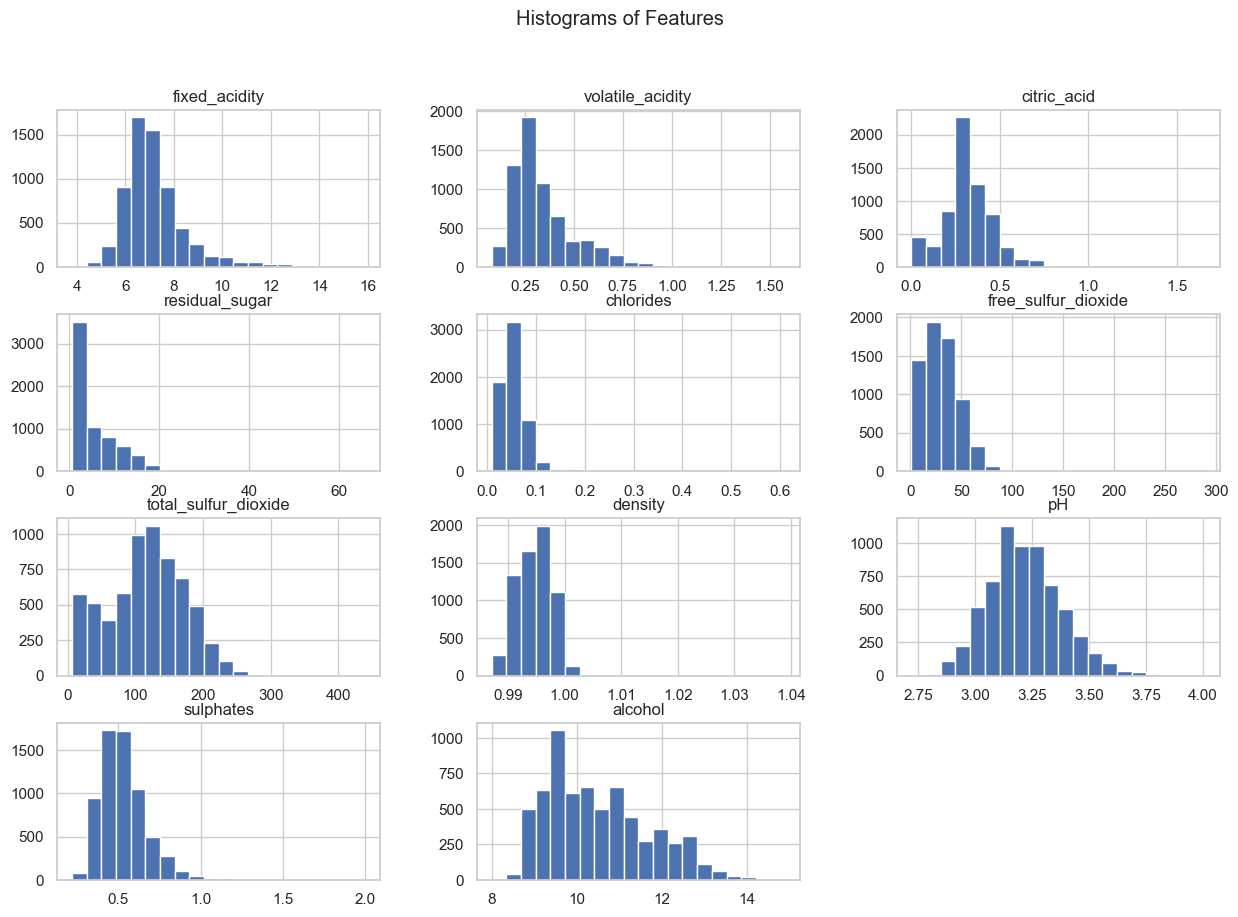

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot histograms for all features
X.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()

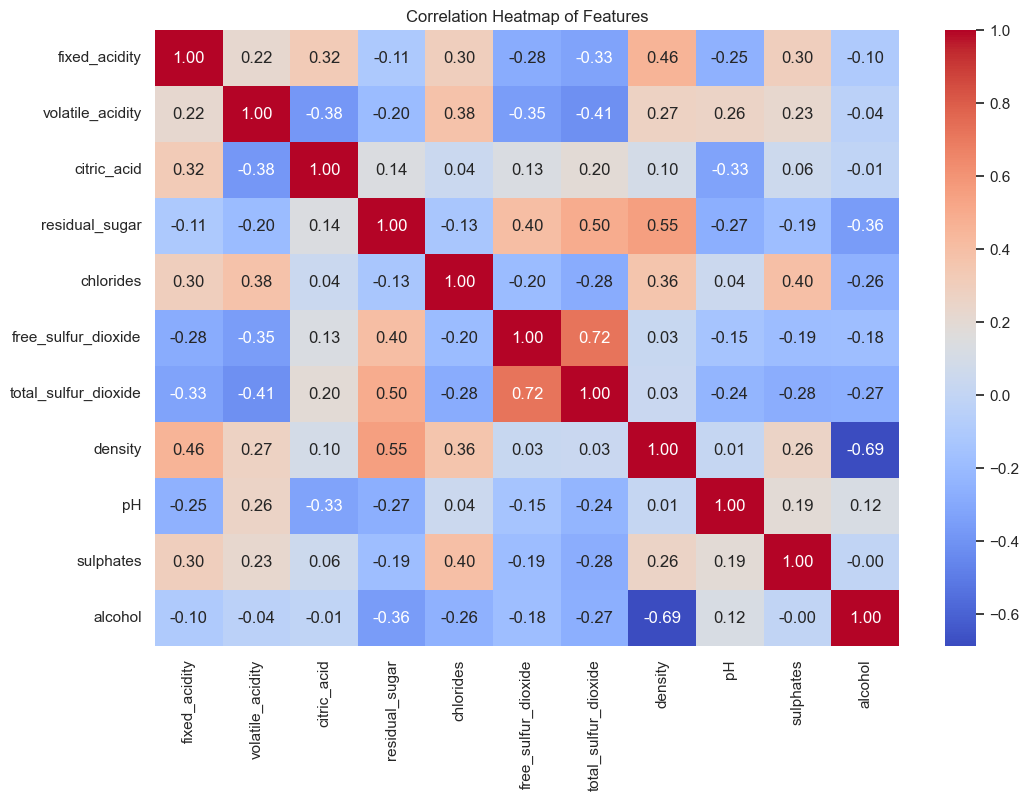

In [4]:
# Plot a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

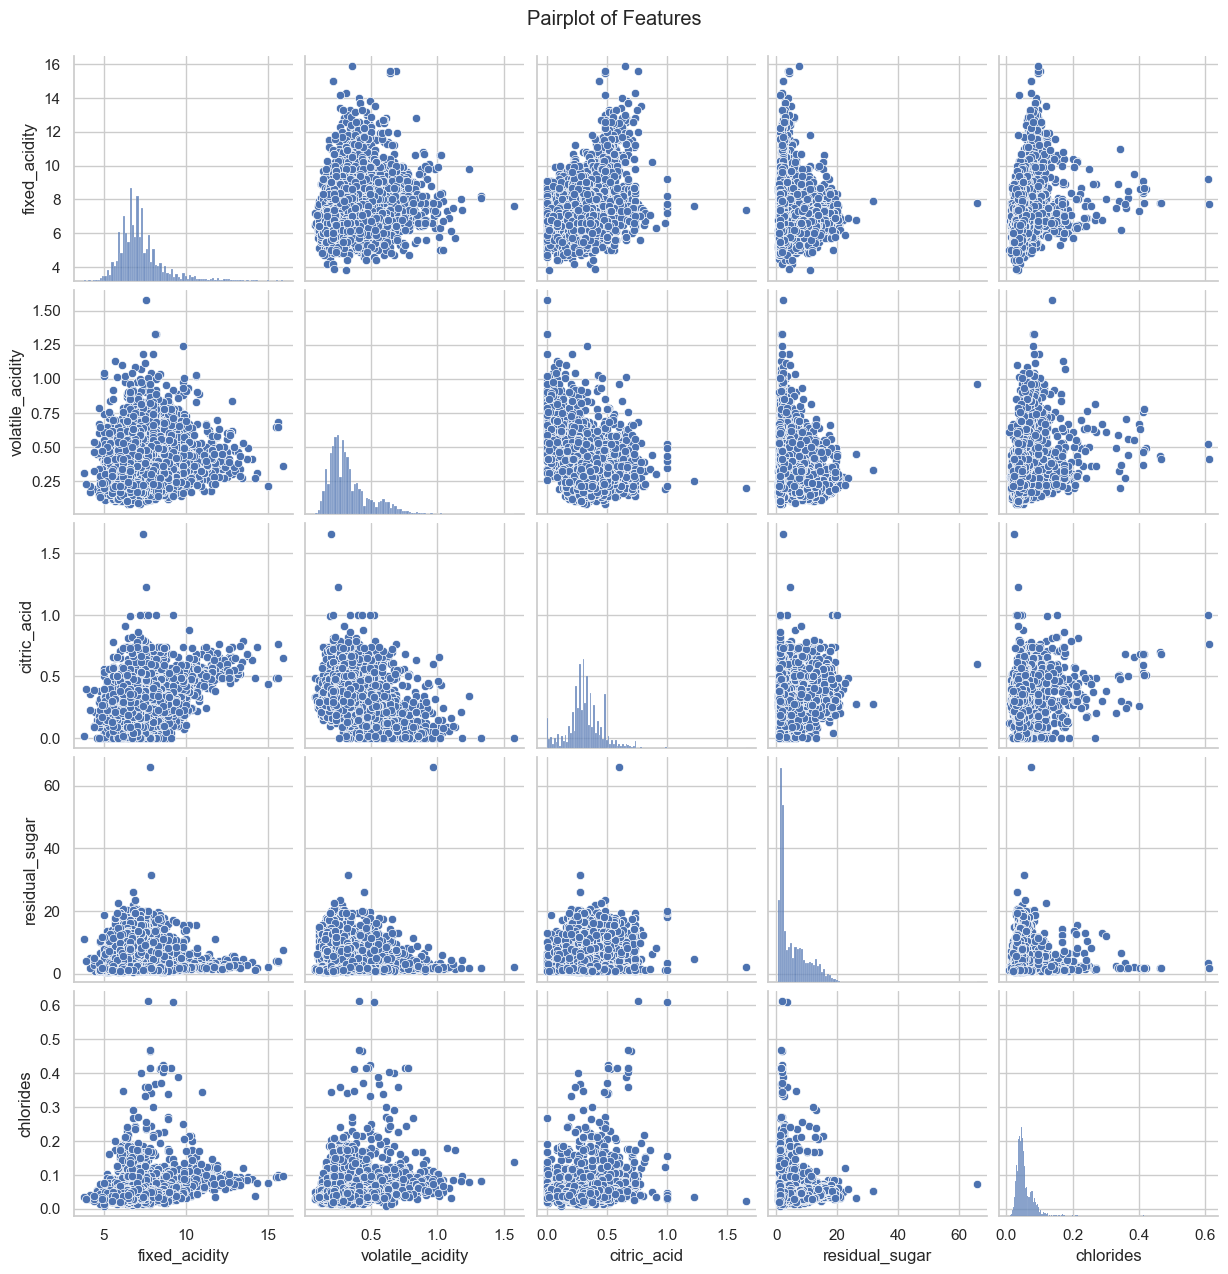

In [5]:
# Plot a pairplot for a subset of features (to avoid too much clutter)
sns.pairplot(X.iloc[:, :5])  # Adjust the subset as needed
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

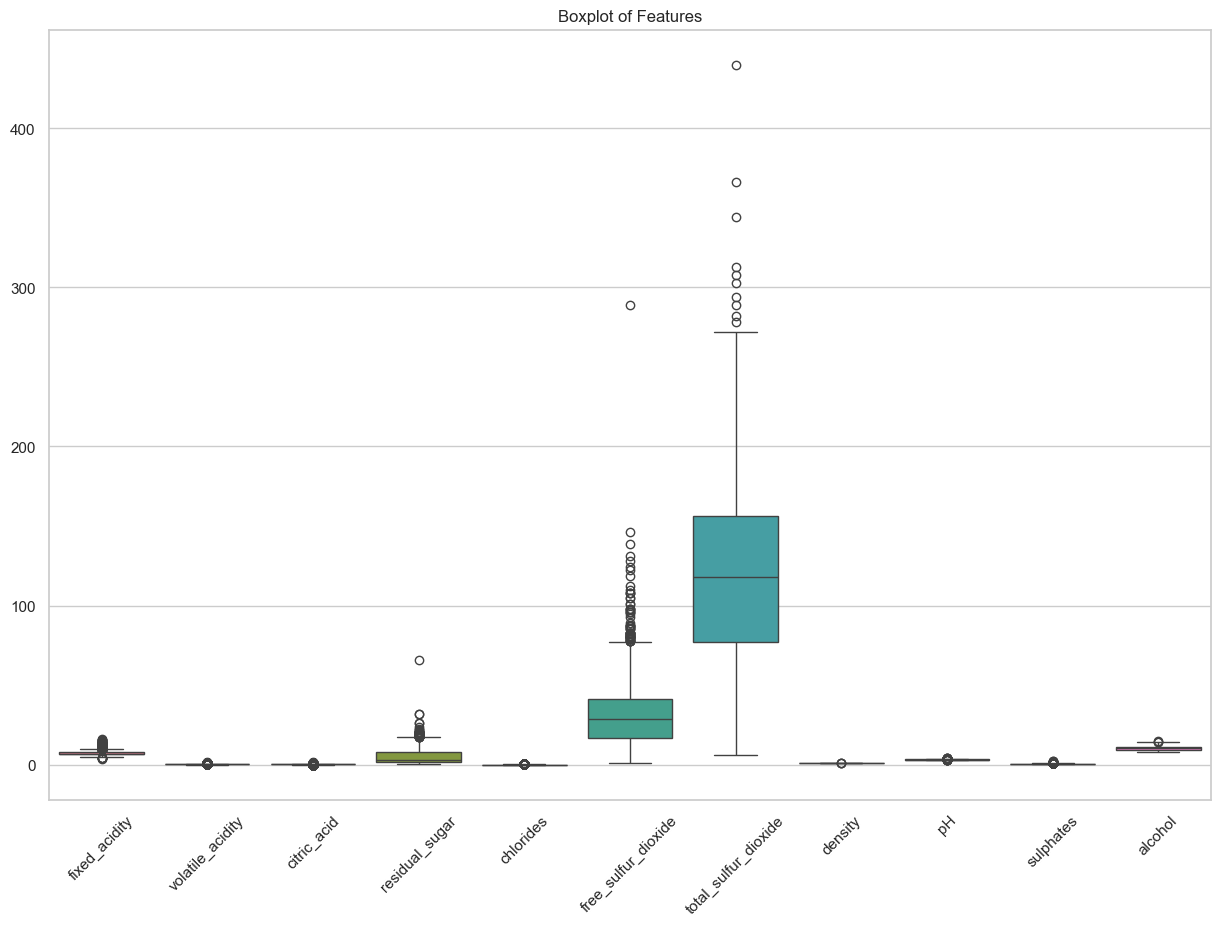

In [6]:
# Boxplot for each feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

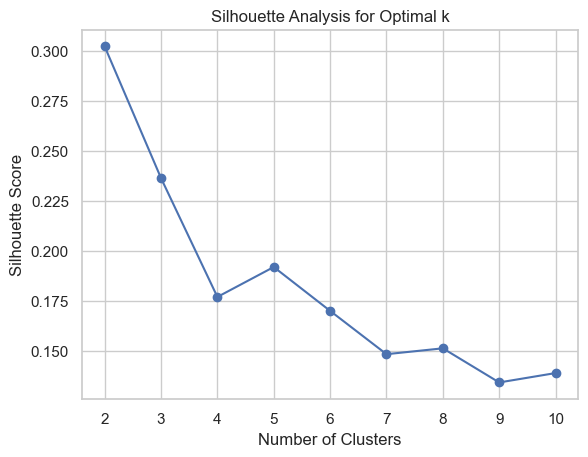

Accuracy: 0.43


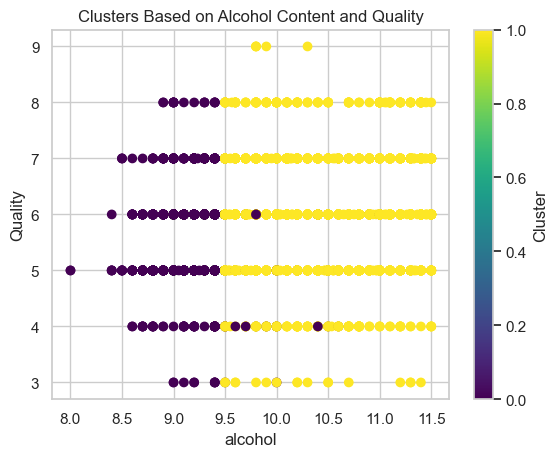

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Wine Quality dataset
from ucimlrepo import fetch_ucirepo
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features
y = wine_quality.data.targets

# Combine features and target for analysis
df = pd.concat([X, y], axis=1)

# Step 1: Compute ECDF for a key feature (e.g., alcohol content)
feature = 'alcohol'
ecdf = ECDF(df[feature])
df['ecdf'] = ecdf(df[feature])

# Exclude outliers (top 20% of values)
threshold = np.percentile(df[feature], 80)
df_filtered = df[df[feature] <= threshold].copy()  # Ensure a copy is made

# Step 2: Cluster data using k-means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered[X.columns])

# Determine optimal number of clusters using Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

# Choose the optimal k (e.g., where Silhouette Score is highest)
optimal_k = np.argmax(silhouette_scores) + 2  # +2 because range starts at 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fix the SettingWithCopyWarning by using .loc[]
df_filtered.loc[:, 'cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Assign "durations" (e.g., median feature values for each cluster)
cluster_medians = df_filtered.groupby('cluster')[feature].median()
df_filtered.loc[:, 'estimated_duration'] = df_filtered['cluster'].map(cluster_medians)

# Step 4: Validate results (compare clusters to actual quality ratings)
df_filtered.loc[:, 'quality_binary'] = (df_filtered['quality'] >= 7).astype(int)
accuracy = accuracy_score(df_filtered['quality_binary'], df_filtered['cluster'])
print(f"Accuracy: {accuracy:.2f}")

# Step 5: Visualize clusters
plt.scatter(df_filtered[feature], df_filtered['quality'], c=df_filtered['cluster'], cmap='viridis')
plt.xlabel(feature)
plt.ylabel('Quality')
plt.title('Clusters Based on Alcohol Content and Quality')
plt.colorbar(label='Cluster')
plt.show()


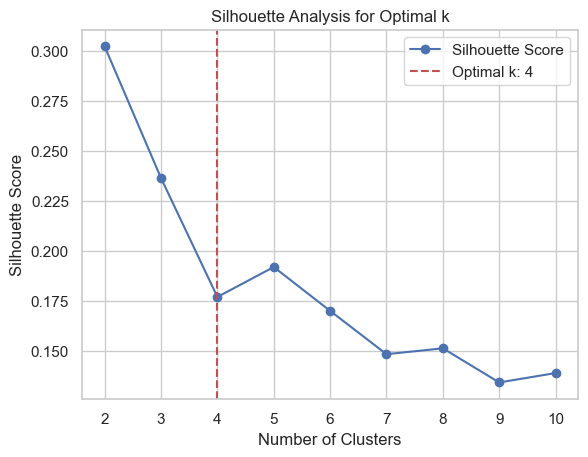

Optimal number of clusters (k): 4


In [8]:
from kneed import KneeLocator
#if encounter error try "!pip install kneed"
# Determine the knee point
k_values = list(range(2, 11))
knee_locator = KneeLocator(k_values, silhouette_scores, curve='convex', direction='decreasing')

optimal_k = knee_locator.knee  # The knee point

# Plot Silhouette Scores with the knee point
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.axvline(x=optimal_k, linestyle='--', color='r', label=f'Optimal k: {optimal_k}')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.legend()
plt.show()

print(f"Optimal number of clusters (k): {optimal_k}")


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features
y = wine_quality.data.targets

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [11]:
# K-means
kmeans = KMeans(n_clusters=4, random_state=42)  # 4 clusters
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluate
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ch = calinski_harabasz_score(X_scaled, kmeans_labels)
kmeans_db = davies_bouldin_score(X_scaled, kmeans_labels)

print("K-means Results:")
print(f"Silhouette Score: {kmeans_silhouette:.3f}")
print(f"Calinski-Harabasz Index: {kmeans_ch:.3f}")
print(f"Davies-Bouldin Index: {kmeans_db:.3f}")

K-means Results:
Silhouette Score: 0.166
Calinski-Harabasz Index: 1428.421
Davies-Bouldin Index: 1.857


In [12]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X_scaled)

# Evaluate (only if more than 1 cluster is found)
if len(np.unique(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
    dbscan_ch = calinski_harabasz_score(X_scaled, dbscan_labels)
    dbscan_db = davies_bouldin_score(X_scaled, dbscan_labels)
else:
    dbscan_silhouette, dbscan_ch, dbscan_db = np.nan, np.nan, np.nan

print("\nDBSCAN Results:")
print(f"Silhouette Score: {dbscan_silhouette:.3f}")
print(f"Calinski-Harabasz Index: {dbscan_ch:.3f}")
print(f"Davies-Bouldin Index: {dbscan_db:.3f}")


DBSCAN Results:
Silhouette Score: -0.453
Calinski-Harabasz Index: 5.852
Davies-Bouldin Index: 1.157


In [13]:
# GMM
gmm = GaussianMixture(n_components=4, random_state=42)  # 4 clusters
gmm_labels = gmm.fit_predict(X_scaled)

# Evaluate
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
gmm_ch = calinski_harabasz_score(X_scaled, gmm_labels)
gmm_db = davies_bouldin_score(X_scaled, gmm_labels)

print("\nGMM Results:")
print(f"Silhouette Score: {gmm_silhouette:.3f}")
print(f"Calinski-Harabasz Index: {gmm_ch:.3f}")
print(f"Davies-Bouldin Index: {gmm_db:.3f}")


GMM Results:
Silhouette Score: 0.107
Calinski-Harabasz Index: 829.056
Davies-Bouldin Index: 2.789


In [14]:
# Spectral Clustering
spectral = SpectralClustering(n_clusters=4, random_state=42)  # 4 clusters
spectral_labels = spectral.fit_predict(X_scaled)

# Evaluate
spectral_silhouette = silhouette_score(X_scaled, spectral_labels)
spectral_ch = calinski_harabasz_score(X_scaled, spectral_labels)
spectral_db = davies_bouldin_score(X_scaled, spectral_labels)

print("\nSpectral Clustering Results:")
print(f"Silhouette Score: {spectral_silhouette:.3f}")
print(f"Calinski-Harabasz Index: {spectral_ch:.3f}")
print(f"Davies-Bouldin Index: {spectral_db:.3f}")

C:\Python312\Lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)



Spectral Clustering Results:
Silhouette Score: 0.783
Calinski-Harabasz Index: 36.861
Davies-Bouldin Index: 0.154


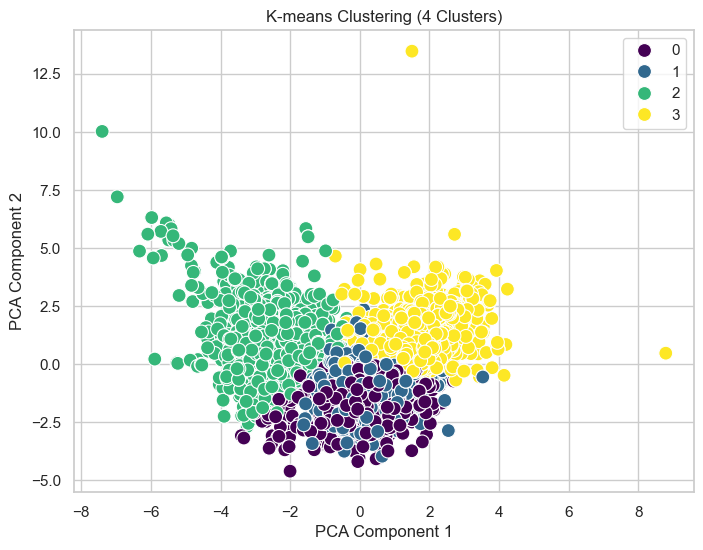

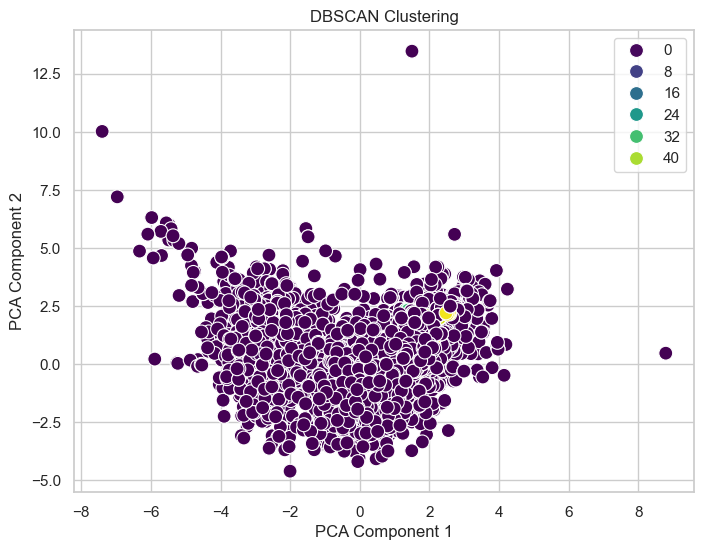

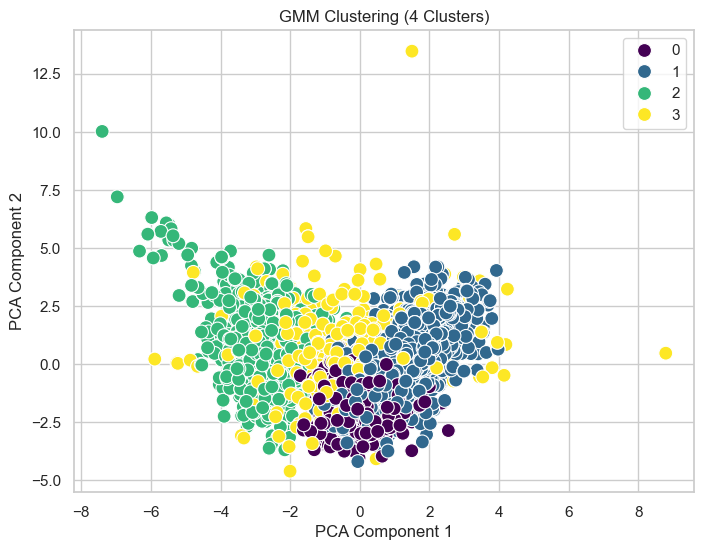

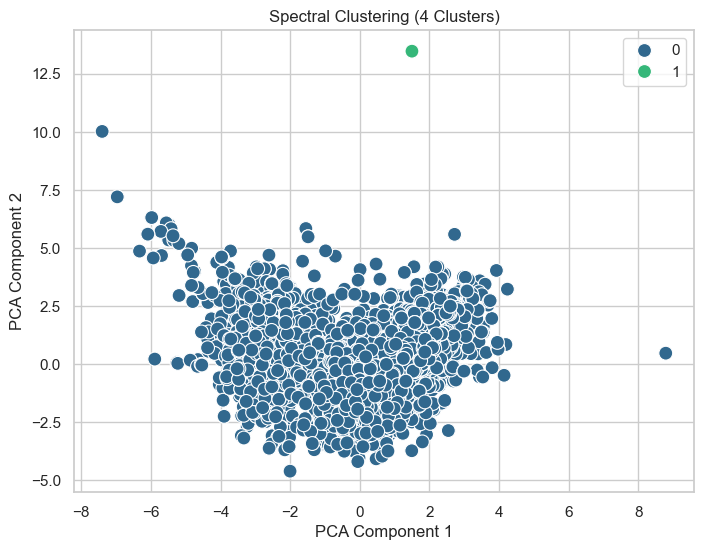

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=100)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

plot_clusters(X_pca, kmeans_labels, 'K-means Clustering (4 Clusters)')
plot_clusters(X_pca, dbscan_labels, 'DBSCAN Clustering')
plot_clusters(X_pca, gmm_labels, 'GMM Clustering (4 Clusters)')
plot_clusters(X_pca, spectral_labels, 'Spectral Clustering (4 Clusters)')